# Project 1

In [1]:
import tensorflow as tf #to import tensorflow in my enviroment
mnist = tf.keras.datasets.mnist # 28*28 images + 70,000 samples from mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data() #to load the data from mnist


x_train = tf.keras.utils.normalize(x_train, axis = 1) # to normalize x_train
x_test = tf.keras.utils.normalize(x_test, axis = 1) #to normalize x_test

model = tf.keras.models.Sequential() # to build up your neural networks
model.add(tf.keras.layers.Flatten()) # to convert 3d dimensions to vector n*1
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # for the first hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # for the second hidden layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #to create the output layer with ten neurons
model.compile(optimizer='adam' , loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=3) #to start the training


11493376/11490434 [==============================] - 10s 1us/step
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2596 - accuracy: 0.9233
Epoch 2/3
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1049 - accuracy: 0.9670
Epoch 3/3
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0721 - accuracy: 0.9765


In [2]:
val_loss, val_acc = model.evaluate(x_test,y_test) #to pass x_test and y_test as a validation 
print(val_loss,val_acc) #to print losses and accuracy of validation

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0958 - accuracy: 0.9706
0.0957693434463814 0.9706


<function matplotlib.pyplot.show(close=None, block=None)>

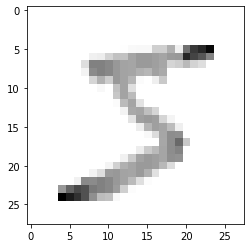

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = plt.cm.binary) #to convert the image to binary
plt.show

#print(x_train[0]) 

In [4]:
model.save('epic_num_reader.model') #to save your parameters

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [5]:
new_model = tf.keras.models.load_model('epic_num_reader.model') #to load the parameters

In [13]:
predictions = new_model.predict(x_test)
print(predictions)

[[4.4016950e-09 2.3635563e-07 5.9365170e-06 ... 9.9996150e-01
  5.1788107e-10 1.7510169e-09]
 [7.8140765e-09 3.8128725e-04 9.9961698e-01 ... 7.6685387e-09
  1.7916143e-07 4.6517337e-10]
 [3.1041477e-08 9.9986017e-01 3.7461064e-06 ... 5.8330887e-05
  8.1925391e-06 5.1877845e-07]
 ...
 [6.4156758e-08 3.8333542e-06 1.4483333e-08 ... 1.2581720e-04
  5.2964247e-06 4.4237229e-05]
 [8.4243904e-05 7.9238489e-06 4.0539607e-07 ... 1.6476981e-05
  5.0661882e-04 1.3235337e-08]
 [3.6922083e-06 4.4150177e-08 1.6765561e-06 ... 3.1835972e-09
  2.0951516e-06 1.5804636e-07]]


In [14]:
import numpy as np #to import numpy 
print(np.argmax(predictions[675])) #to get the predicted value of index 0 i.e neural zero

1


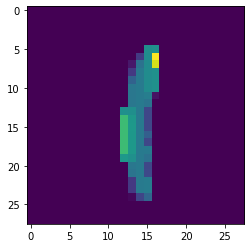

In [15]:
plt.imshow(x_test[675])
plt.show()